In [3]:
# Import required modules
import pandas as pd

In [4]:
# Load the data
data = pd.read_csv(
    filepath_or_buffer="../data/raw/hotel_reservations.csv",
    sep=",",
    header=0
)

In [5]:
# Display the first few rows of the data
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
import sys

data.info(
    verbose=True,
    buf=sys.stdout,
    memory_usage=True,
    show_counts=True
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
# Select columns that have numerical data type
data.select_dtypes(include=['number']).head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0


### no_of_adults

In [8]:
data['no_of_adults'].describe()

count    36275.000000
mean         1.844962
std          0.518715
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: no_of_adults, dtype: float64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

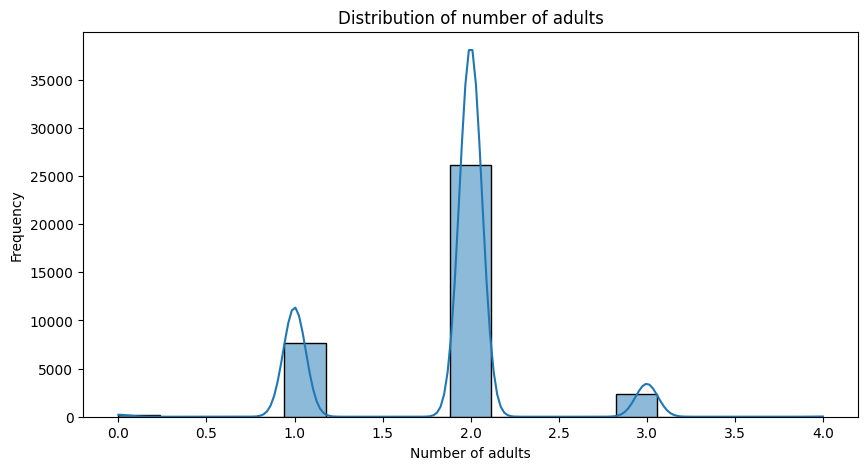

In [10]:
# Showing histogram
plt.figure(figsize=(10, 5))
sns.histplot(data['no_of_adults'], kde=True)
plt.title('Distribution of number of adults')
plt.xlabel('Number of adults')
plt.ylabel('Frequency')
plt.show()

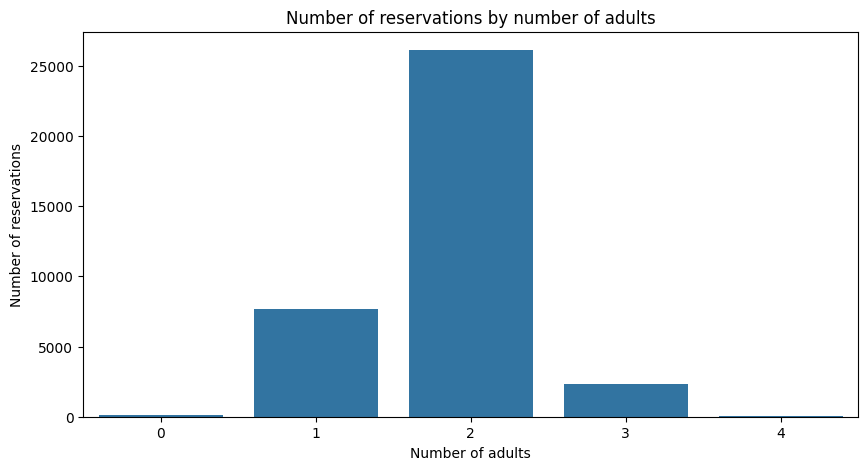

In [11]:
# Creating a bar plot for no_of_adults
plt.figure(figsize=(10, 5))
sns.countplot(x=data['no_of_adults'])
plt.title('Number of reservations by number of adults')
plt.xlabel('Number of adults')
plt.ylabel('Number of reservations')
plt.show()

In [12]:
from scipy.stats import shapiro

stat, p_value = shapiro(data['no_of_adults'])
print(f"Shapiro-Wilk test statistika: {stat}, p-vrednost: {p_value}")

if p_value > 0.05:
    print("Podaci imaju normalnu raspodelu (ne odbacuje se hipoteza H0).")
else:
    print("Podaci nemaju normalnu raspodelu (odbacuje se hipoteza H0).")

Shapiro-Wilk test statistika: 0.6928603649139404, p-vrednost: 0.0
Podaci nemaju normalnu raspodelu (odbacuje se hipoteza H0).


C:\Users\marij\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### no_of_children

In [13]:
data['no_of_children'].describe()

count    36275.000000
mean         0.105279
std          0.402648
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: no_of_children, dtype: float64

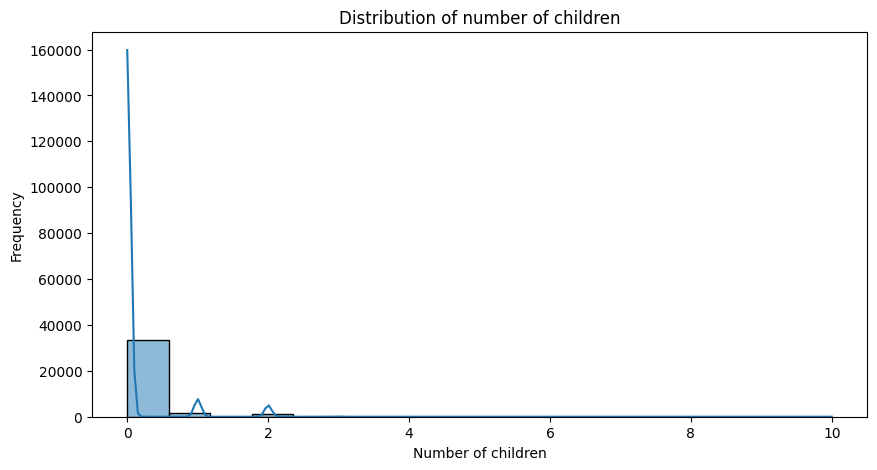

In [14]:
# Showing histogram for no_of_children
plt.figure(figsize=(10, 5))
sns.histplot(data['no_of_children'], kde=True)
plt.title('Distribution of number of children')
plt.xlabel('Number of children')
plt.ylabel('Frequency')
plt.show()

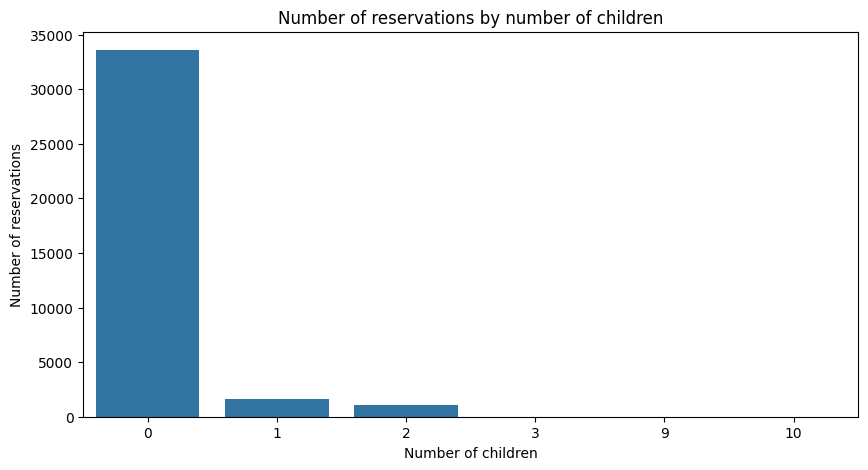

In [15]:
# Creating a bar plot for no_of_children
plt.figure(figsize=(10, 5))
sns.countplot(x=data['no_of_children'])
plt.title('Number of reservations by number of children')
plt.xlabel('Number of children')
plt.ylabel('Number of reservations')
plt.show()

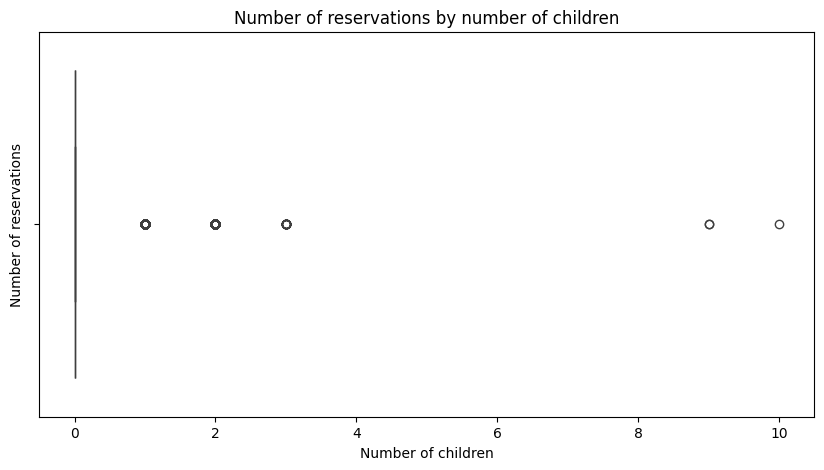

In [16]:
# Creating a box plot for no_of_children
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['no_of_children'])
plt.title('Number of reservations by number of children')
plt.xlabel('Number of children')
plt.ylabel('Number of reservations')
plt.show()

### no_of_weekend_nights

In [21]:
data['no_of_weekend_nights'].describe()

count    36275.000000
mean         0.810724
std          0.870644
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: no_of_weekend_nights, dtype: float64

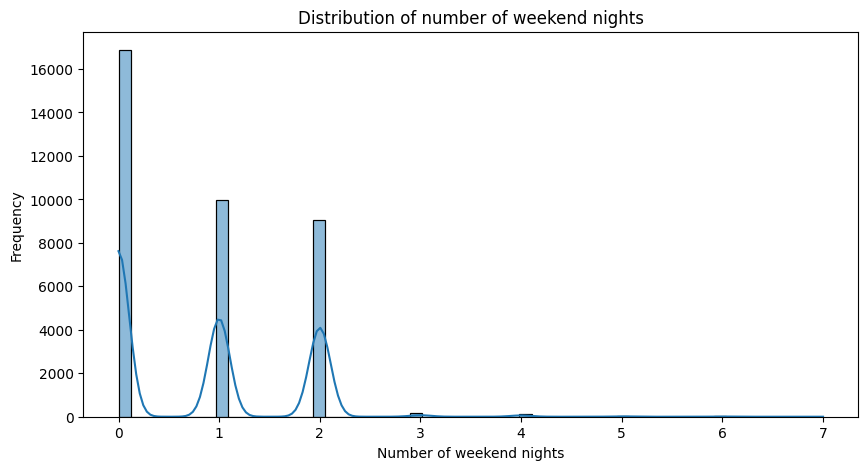

In [19]:
# Showing histogram for no_of_weekend_nights
plt.figure(figsize=(10, 5))
sns.histplot(data['no_of_weekend_nights'], kde=True)
plt.title('Distribution of number of weekend nights')
plt.xlabel('Number of weekend nights')
plt.ylabel('Frequency')
plt.show()

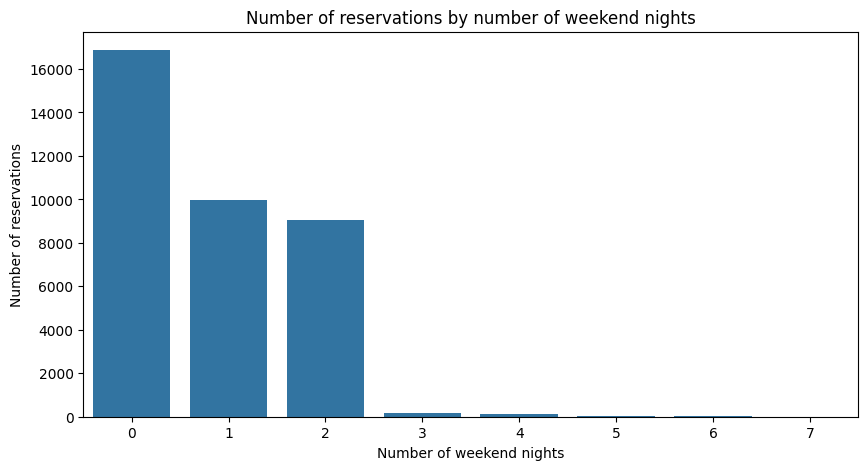

In [20]:
# Creating a bar plot for no_of_weekend_nights
plt.figure(figsize=(10, 5))
sns.countplot(x=data['no_of_weekend_nights'])
plt.title('Number of reservations by number of weekend nights')
plt.xlabel('Number of weekend nights')
plt.ylabel('Number of reservations')
plt.show()